In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [71]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# scantron*_38

In [78]:
scantronMath_38_df = pd.read_csv('../../dataframes/scantronMath_38.csv')
scantronReading_38_df = pd.read_csv('../../dataframes/scantronReading_38.csv')


In [79]:
scantronReading_38_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.969279
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False

In [80]:
scantronMath_38_course_list = [col for col in scantronMath_38_df.columns if col.startswith('course_')]
scantronReading_38_course_list = [col for col in scantronReading_38_df.columns if col.startswith('course_')]
print("scantronMath_38_course_list length:", len(scantronMath_38_course_list))
print("scantronReading38_course_list length:", len(scantronReading_38_course_list))

scantronMath_38_course_list length: 124
scantronReading38_course_list length: 124


In [133]:
# Get all course columns
course_cols = [col for col in scantronMath_38_df.columns if col.startswith('course_')]

# Drop rows where all course columns are 0
scantronMath_38_df = scantronMath_38_df[~scantronMath_38_df[course_cols].eq(0).all(axis=1)]


In [137]:
scantronMath_38_df['level'].value_counts()

level
7    814
8    812
4    799
5    772
6    738
3     11
Name: count, dtype: int64

In [138]:
# Create dictionary to store courses by grade level
scantron_38_course_grades = {3: [], 4: [], 5: [], 6: [], 7: [], 8: []}

# Iterate through course list and add to appropriate grade levels
for course in scantronMath_38_course_list:
    
    # Check each grade level
    for grade in scantron_38_course_grades.keys():
        # Convert grade to string for checking
        grade_str = str(grade)
        
        # Add course if grade number appears in course name
        if grade_str in course:
            scantron_38_course_grades[grade].append(course.lower())

# Sort courses within each grade level
for grade in scantron_38_course_grades:
    scantron_38_course_grades[grade].sort()


In [139]:
scantron_38_course_grades

{3: ['course_language 3',
  'course_math 3',
  'course_pe 3',
  'course_read 3',
  'course_reading 3',
  'course_science 3',
  'course_soc st 3'],
 4: ['course_hwk-4',
  'course_language 4',
  'course_math 4',
  'course_pe 4',
  'course_reading 4',
  'course_science 4',
  'course_soc st 4'],
 5: ['course_advisory 5',
  'course_careerprepa5',
  'course_elagrpk5h/ad',
  'course_english la 5',
  'course_gifted 5',
  'course_math 5',
  'course_math,grade 5',
  'course_math5h/adv',
  'course_music grade5',
  'course_pe 5',
  'course_phys ed gr 5',
  'course_science 5',
  'course_science gr 5',
  'course_scig5h/a',
  'course_soc st 5',
  'course_socialstugr5',
  'course_sost5h/a',
  'course_wldhis 1500'],
 6: ['course_advisory 6',
  'course_aidstu6-12nc',
  'course_band 6',
  'course_ela intpk-6',
  'course_elagrpk6h/ad',
  'course_englang6',
  'course_english la 6',
  'course_enrichmtp6',
  'course_eslenrich6-8',
  'course_eslenrich6-8',
  'course_extrcur6-12c',
  'course_math 6',
  'course

In [152]:
scantronMath_38_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.957757,0,0,0,0
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [153]:
scantronMath_38_encoded_df = scantronMath_38_df.copy()

In [154]:
core_keywords = {
    'math': ['math'],
    'reading': ['read','ela', 'eng'],
    'science': ['sci'],
    'social-studies': ['soc','wldhis']
}
elective_keywords = {
    'music': ['band', 'music'],
    'art': ['art', 'broadcast', 'yearbook'],
    'phys-ed': ['pe', 'physed']
}

In [155]:
subject_cols = [key for key in core_keywords.keys()]
elective_cols = [key for key in elective_keywords.keys()]
course_cols = [col for col in scantronMath_38_df.columns if col.startswith('course_')]
grade_levels = [3, 4, 5, 6, 7, 8]

for col in subject_cols:
    scantronMath_38_encoded_df[f'subject_{col}'] = -1


for idx, row in scantronMath_38_encoded_df.iterrows():
    student_grade = row['level'] - 1 # Subtract 1 because grade levels is when the score is from (features are from year previous)
    subject_levels = {subject: None for subject in core_keywords.keys()}
    # scantronMath_38_encoded_df[f'subject_{col}'] = np.nan

    # Check if student is enrolled in any courses
    for course in course_cols:
        if row[course] == 1:
            course_lower = course.lower()
            # Get subject of course
            for subject, keywords in core_keywords.items():
                if any(keyword in course_lower for keyword in keywords):
                    # Find the grade level in the course name
                    for grade in grade_levels:
                        if str(grade) in course_lower:
                            course_grade = grade
                            # Update subject level based on priority:
                            # Prefer at-grade courses, then above-grade, then below-grade
                            current_level = subject_levels[subject]
                            if current_level is None:
                                subject_levels[subject] = course_grade
                            else:
                                # Prioritize grade-level courses
                                if abs(student_grade - course_grade) < abs(student_grade - current_level):
                                    subject_levels[subject] = course_grade
                                # If same distance, prefer higher level
                                elif abs(student_grade - course_grade) == abs(student_grade - current_level):
                                    subject_levels[subject] = max(course_grade, current_level)
    
    # After checking all courses, encode the final levels
    for subject, course_grade in subject_levels.items():
        if course_grade is None:
            scantronMath_38_encoded_df.loc[idx, f'subject_{subject}'] = 0
        elif course_grade < student_grade:
            scantronMath_38_encoded_df.loc[idx, f'subject_{subject}'] = 1
        elif course_grade == student_grade:
            scantronMath_38_encoded_df.loc[idx, f'subject_{subject}'] = 2
        else:
            scantronMath_38_encoded_df.loc[idx, f'subject_{subject}'] = 3


scantronMath_38_encoded_df.drop(columns=course_cols, inplace=True)
# Drop columns that are all 0 or False
zero_cols = scantronMath_38_encoded_df.columns[(scantronMath_38_encoded_df == 0).all() | (scantronMath_38_encoded_df == False).all()]
scantronMath_38_encoded_df = scantronMath_38_encoded_df.drop(columns=zero_cols)
scantronMath_38_encoded_df.head(10)

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,False,True,False,False,False,0.957757,2,2,2,2
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,False,True,False,False,False,0.949346,2,2,2,1
2,44784,6,value_scantronMath,True,1.021622,False,False,False,False,False,True,False,False,False,0.990132,2,2,2,2
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,False,True,False,False,False,1.035514,2,2,1,2
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,False,True,False,False,False,0.934393,2,2,2,2
5,44810,7,value_scantronMath,False,0.932191,False,False,False,False,False,True,False,False,False,0.947664,2,2,2,2
6,44811,7,value_scantronMath,False,0.896342,False,False,False,False,False,True,False,False,False,0.913458,2,2,1,2
8,44814,7,value_scantronMath,False,0.947138,False,False,False,False,False,True,False,False,False,0.966355,2,2,1,2
9,44815,6,value_scantronMath,False,0.969129,False,False,False,False,False,True,False,False,False,0.952786,2,2,2,2
10,44816,7,value_scantronMath,False,0.936687,False,False,False,False,False,True,False,False,False,0.969346,2,2,1,2


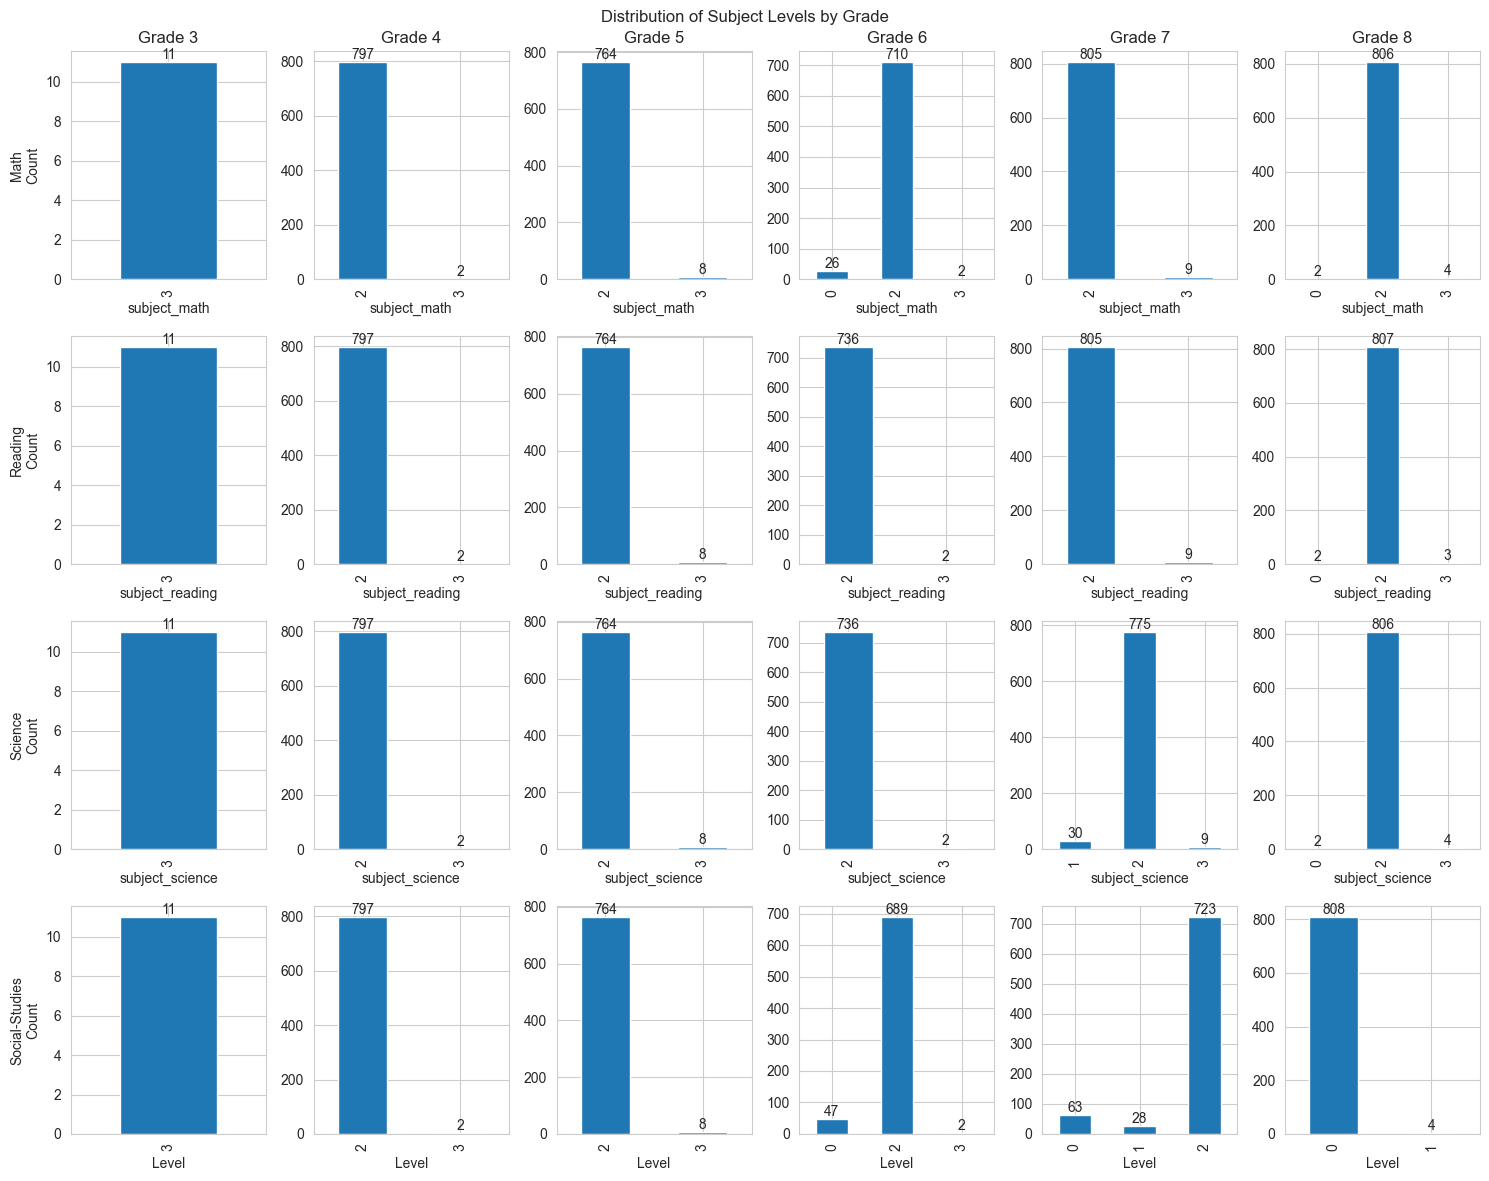

In [156]:
# Create a figure with subplots for each subject distribution
fig, axes = plt.subplots(len(subjects), len(set(scantronMath_38_encoded_df['level'])), figsize=(15, 12))
fig.suptitle('Distribution of Subject Levels by Grade')

subjects = ['math', 'reading', 'science', 'social-studies']
grade_levels = sorted(scantronMath_38_encoded_df['level'].unique())

for i, subject in enumerate(subjects):
    col = f'subject_{subject}'
    
    for j, grade in enumerate(grade_levels):
        ax = axes[i,j]
        
        # Filter for just this grade level
        grade_df = scantronMath_38_encoded_df[scantronMath_38_encoded_df['level'] == grade]
        
        # Create value counts and plot as bar chart
        value_counts = grade_df[col].value_counts().sort_index()
        value_counts.plot(kind='bar', ax=ax)
        
        if i == 0:
            ax.set_title(f'Grade {grade}')
        if j == 0:
            ax.set_ylabel(f'{subject.title()}\nCount')
        if i == len(subjects)-1:
            ax.set_xlabel('Level')
            
        # Add value labels on top of bars
        for k, v in enumerate(value_counts):
            ax.text(k, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [146]:
scantronMath_38_encoded_df['is_proficient'].value_counts()

is_proficient
False    2713
True     1233
Name: count, dtype: int64

In [147]:
scantronMath_38_df[scantronMath_38_df['level'] == 6].head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies
2,44784,6,value_scantronMath,True,1.021622,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.990132,0,0,0,0
9,44815,6,value_scantronMath,False,0.969129,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,F

In [130]:
# Calculate correlation matrix between all features and is_proficient
correlations = scantronMath_38_encoded_df.drop(['studentId', 'proficient_score', 'dataSource', 'past_proficient_score'], axis=1).corr()['is_proficient'].sort_values(ascending=False)

# Display correlations, excluding is_proficient's correlation with itself
print("Correlations with is_proficient:")
print(correlations[correlations.index != 'is_proficient'])


Correlations with is_proficient:
level                           0.030632
school_Elementary School B      0.022216
school_Middle School C          0.021257
school_Middle School D          0.017935
school_Intermediate School E    0.003134
subject_math                    0.002356
subject_science                 0.001577
subject_reading                 0.001006
school_Elementary School E      0.000805
school_Middle School A         -0.003463
school_Elementary A            -0.008724
school_Middle School F         -0.016135
subject_social-studies         -0.022551
school_Elementary School F     -0.030902
iready_reading                 -0.042377
iready_math                    -0.042400
Name: is_proficient, dtype: float64


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix


In [126]:
# Separate features and target variable
X = scantronMath_38_encoded_df.drop(['studentId', 'is_proficient', 'proficient_score', 'dataSource', 'past_proficient_score'], axis=1)
y = scantronMath_38_encoded_df['proficient_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=scantronMath_38_encoded_df['is_proficient'])

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_continuous = model.predict(X_test)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = y_pred_continuous >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.69      1.00      0.82      2842
        True       0.00      0.00      0.00      1273

    accuracy                           0.69      4115
   macro avg       0.35      0.50      0.41      4115
weighted avg       0.48      0.69      0.56      4115


Confusion Matrix:
[[2841    1]
 [1273    0]]

Top 10 Most Important Features:
                         feature  importance
2     school_Elementary School B    0.084555
5   school_Intermediate School E    0.075521
1            school_Elementary A    0.070665
7         school_Middle School C    0.070076
3     school_Elementary School E    0.059984
8         school_Middle School D    0.056802
6         school_Middle School A    0.052086
4     school_Elementary School F    0.049545
9         school_Middle School F    0.033906
13               subject_reading    0.024501


## grade 3

In [47]:
# Create scantronMath_3 and drop columns that are all 0
scantronMath_3 = scantronMath_38_df[scantronMath_38_df['level'] == 3]
print(scantronMath_3.shape)
zero_cols = scantronMath_3.columns[(scantronMath_3 == 0).all()]
scantronMath_3 = scantronMath_3.drop(columns=zero_cols)
print(scantronMath_3.shape)
scantronMath_3['studentId'].nunique()

(3317, 142)
(3317, 23)


3317

In [50]:
# Get all course columns
course_cols = [col for col in scantronMath_3.columns if col.startswith('course_')]

# Count rows where all course columns are 0
zero_course_rows = (scantronMath_3[course_cols] == 0).all(axis=1).sum()
print(f"Number of rows with all 0s for course columns: {zero_course_rows}")


Number of rows with all 0s for course columns: 3306


In [51]:
# Find duplicate student IDs in scantronMath_3
duplicate_ids = scantronMath_3['studentId'].value_counts()
duplicate_ids = duplicate_ids[duplicate_ids > 1]

if len(duplicate_ids) > 0:
    print("Students appearing multiple times:")
    print(duplicate_ids)
else:
    print("No duplicate student IDs found")


No duplicate student IDs found


In [53]:
scantron_38_course_grades[3]

['course_LANGUAGE 3',
 'course_MATH 3',
 'course_PE 3',
 'course_READ 3',
 'course_READING 3',
 'course_SCIENCE 3',
 'course_SOC ST 3']

In [54]:
print(scantronMath_38_df[scantronMath_38_df['level'] == 3].is_proficient.value_counts())
print(scantronMath_38_df[scantronMath_38_df['level'] == 3].proficient_score.mean())


is_proficient
False    2230
True     1087
Name: count, dtype: int64
0.9483858384935593


In [55]:
scantronMath_38_df[scantronMath_38_df['level'] == 3]['iready_math'].value_counts()

iready_math
0    3167
2     144
1       6
Name: count, dtype: int64

In [56]:
print(scantronMath_38_df[(scantronMath_38_df['level'] == 3) & (scantronMath_38_df['iready_math'] == 0)].is_proficient.value_counts())


is_proficient
False    2117
True     1050
Name: count, dtype: int64


In [58]:
scantronMath_4 = scantronMath_38_df[scantronMath_38_df['level'] == 4]
zero_cols = scantronMath_4.columns[(scantronMath_4 == 0).all()]
scantronMath_4 = scantronMath_4.drop(columns=zero_cols)
print(scantronMath_4.shape)

cols_to_drop = ['studentId', 'level', 'dataSource', 'is_proficient', 'past_proficient_score']
correlation_df = scantronMath_4.drop(columns=cols_to_drop)

correlations = correlation_df.corr()['proficient_score'].sort_values(ascending=False)

print("4th grade")
print("Correlations with proficient_score:")
print(correlations)

(3491, 34)
4th grade
Correlations with proficient_score:
proficient_score                1.000000
course_Gifted                   0.071195
course_READING 3                0.065906
school_Intermediate School E    0.063277
course_SCIENCE 3                0.055027
course_LANGUAGE 3               0.055027
course_MATH 3                   0.055027
course_PE 3                     0.055027
course_SOC ST 3                 0.055027
course_Handwriting              0.045200
school_Elementary School B      0.036401
course_HWK-4                    0.035316
school_Elementary A             0.026124
course_HOMEROOM                 0.016524
school_Elementary School E      0.004890
course_HANDWRITING              0.004890
course_Sp&Lang Imp             -0.000769
course_READING 4               -0.002289
course_SCIENCE 4               -0.002289
course_SOC ST 4                -0.002289
course_PE 4                    -0.002289
course_MATH 4                  -0.002289
course_LANGUAGE 4              -0.002289


In [62]:
# Initialize counter for mismatched grade levels
grade_mismatches = 0

# Iterate through each student in the dataframe
for idx, row in scantronMath_38_df.iterrows():
    student_level = row['level']
    
    # Check each grade level's courses
    for grade in scantron_38_course_grades.keys():
        # Look for courses from this grade level
        grade_courses = scantron_38_course_grades[grade]
        
        # Check if student is taking any courses from this grade
        student_courses = [col for col in grade_courses if row[col] == 1]
        
        # If student is taking courses from this grade but it's not their level
        if len(student_courses) > 0 and grade != student_level:
            grade_mismatches += len(student_courses)

print(f"Number of course enrollments where student grade level doesn't match course grade level: {grade_mismatches}")


Number of course enrollments where student grade level doesn't match course grade level: 23869
